**Linear regression by using Deep Neural network: Implement Boston housing price 
prediction problem by Linear regression using Deep Neural network. Use Boston House price 
prediction dataset**

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('datasets/boston.csv')

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6

In [10]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error')

In [11]:
history = model.fit(X_train_scaled, y_train, epochs=500, batch_size=32, validation_split=0.2)

Epoch 1/500
11/11 [==============================] - 2s 48ms/step - loss: 636.9514 - val_loss: 566.3799
Epoch 2/500
11/11 [==============================] - 0s 11ms/step - loss: 631.8538 - val_loss: 561.7933
Epoch 3/500
11/11 [==============================] - 0s 11ms/step - loss: 624.5384 - val_loss: 557.3939
Epoch 4/500
11/11 [==============================] - 0s 10ms/step - loss: 618.4321 - val_loss: 553.0033
Epoch 5/500
11/11 [==============================] - 0s 10ms/step - loss: 615.2437 - val_loss: 548.5233
Epoch 6/500
11/11 [==============================] - 0s 12ms/step - loss: 610.2128 - val_loss: 543.8998
Epoch 7/500
11/11 [==============================] - 0s 11ms/step - loss: 604.9578 - val_loss: 538.9929
Epoch 8/500
11/11 [==============================] - 0s 11ms/step - loss: 599.8648 - val_loss: 533.7229
Epoch 9/500
11/11 [==============================] - 0s 11ms/step - loss: 593.8163 - val_loss: 528.2894
Epoch 10/500
11/11 [==============================] - 0s 11ms/st

In [12]:
mse_test = model.evaluate(X_test_scaled, y_test)
print("Mean Squared Error on Test Set:", mse_test)

4/4 [==============================] - 0s 4ms/step - loss: 13.9921
Mean Squared Error on Test Set: 13.992098808288574


In [13]:
mse_train = model.evaluate(X_train_scaled, y_train)
print("Mean Squared Error on Training Set:", mse_train)

13/13 [==============================] - 0s 2ms/step - loss: 11.3947
Mean Squared Error on Training Set: 11.394721031188965


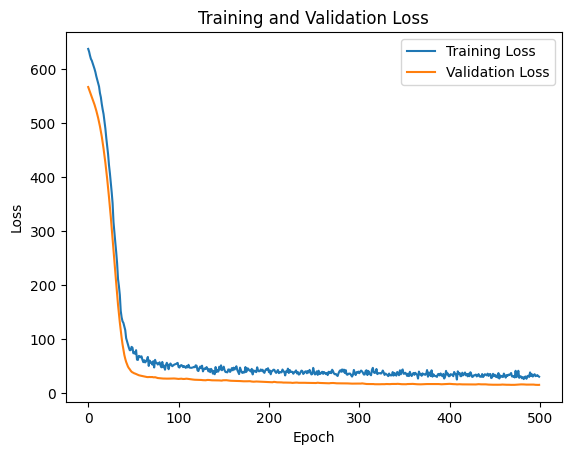

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [15]:
predictions = model.predict(X_test_scaled)

4/4 [==============================] - 0s 4ms/step


In [16]:
print("Predicted Price:", predictions[0][0])
print("Actual Price:", y_test[0])

Predicted Price: 27.441332
Actual Price: 24.0
